# Lecture 09

Original paper: https://arxiv.org/abs/1406.2661

이번시간에 배울 내용은 이제는 너무나도 중요하고 많은 연구들이 활발히 진행되어지고 있는 GAN에 대해서 알아보겠습니다. GAN의 풀네임은 Generative Adversarial Network 입니다. 적대적인 생성모델 이라는 것인데 적대적인 생성모델이라는 것이 무엇일까요??  
GAN은 Generator와 Distriminator 두 모델이 적대적인 학습을 하게 됩니다. 논문에서도 나온 설명을 예로 들어보겠습니다. Generator는 위조지폐범 Distriminator는 경찰로 예를 들 수 있습니다. 이 위조지폐범은 초기에 똑똑하지 못해서 위조지폐의 퀄리티가 굉장히 낮습니다. 또한 이 경찰도 똑똑하지 못하여 위조지폐와 진짜지폐를 구별해 내지 못하죠. 하지만 점차적으로 경찰이 지폐와 위조지폐를 구별해 내기 시작하면 위조지폐범 또한 좀 더 구별하지 못하도록 위조지폐의 퀄리티를 높히게 됩니다. 

### Reference 

GAN에 대한 설명은 사실 너무 잘 되어있는 곳이 많기 때문에 아래 링크에서의 설명을 많이 참고했습니다.

**유재준님의 블로그**: http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html  
**TF-korea PR12영상(유재준님)** : https://www.youtube.com/watch?v=L3hz57whyNw  
**최윤제님의 GAN 설명 동영상**: https://www.youtube.com/watch?v=odpjk7_tGY0

### Data distribution

![gan_distribution.png](./figure/gan_distribution.png)

**MNIST** 데이터의 분포가 위와 같다고 가정을 해보면 우리의 데이터의 분포는 실제 0부터 9까지의 확률분포값은 높을 것입니다. 하지만 굉장히 Noise가 낀 데이터 실제로 우리가 가지고 있지 않는 데이터라면 확률분포값이 굉장히 0에 가깝겠죠? 초기이 Generator는 저런 이미지를 마구 생성해 낼 것입니다. 하지만 적대적인 학습을 통해서 우리가 실제 가지는 데이터 분포와 근사시키자는 것이 GAN의 학습방식입니다.

![gan_learning.png](./figure/gan_learning.png)
출처: https://arxiv.org/abs/1406.2661

위에서 보여주는 그래프는 GAN의 학습방식을 아주 잘 요약해서 설명해주고 있습니다. 단계별로 같이 살펴보겠습니다. 우선 파란색으로 표시된 line은 Discriminator, 초록색은 Generator, 검정색은 Real data distribution입니다. z는 Generator의 확률분포입니다.

* **(a)** : a단계를 보면 x의 distribution과 z의 distribution의 차이가 큽니다. 또 한 z에서 화살표의 방향을 본다면 x의 분포에서 0에 가까운 즉 존재하지 않을 정도의 분포를 가지는 쪽으로 밀집되어있습니다. 이말은 초기에 z가 Real data의 분포만큼 제대로 된 이미지를 가지지 못한다는 것을 의미합니다. 파란색의 Discriminator는 이 이미지가 진짜인지 가짜인지를 구별해야 합니다. 따라서 maximum은 1, minimum은 0의 확률값을 가지겠죠. 하지만 이 Discriminator도 초기에는 많이 흔들리는 모습을 보입니다. 그 것은 이 구별자가 진짜와 가짜를 잘 판별하지 못한다는 것으로 해석할 수 있겠죠


* **(b)** : b의 단계는 Discriminator가 학습한 경우입니다. 위에서 확인할 수 있듯이 구별자가 Real data의 확률밀도값이 높을 때에는 1, Generator가 만들어 낸 Fake data의 확률밀도값이 높을 경우에는 0에 가까운 값을 가지게 됩니다. 


* **(c)** : c의 단계는 Generator가 학습하는 경우입니다. b단계에서 구별자가 잘 구별해내니 Generator의 입장에서는 좀 더 진짜같은 데이터를 만들어서 구별자를 속이자는 것입니다. 따라서 이 Generator의 distribution이 Real 데이터의 분포와 가까워지려 할 것입니다.


* **(d)** : b와 c의 단계를 반복적으로 진행하게 되면 최종적으로 Generator는 Real한 데이터의 분포에 근사할 것이고 그만큼 구별자는 Real 과 Fake를 판단하지 못할 것입니다. 이것이 적대적으로 반복학습한 결과입니다.


### Object Fuction

![minmax.png](./figure/minmax.png)

GAN 의 목적함수는 다음과 같습니다. $V(D, G)$ 에서 $G$를 최소화하고 $D$를 최대화 하는 minmax Problem을 사용합니다. $x~p_{data(x)}$ 는 실제 데이터의 확률분포입니다.  

**D의 입장** : D의 입장에선 목적함수를 최대화해야 합니다. 구별자가 진짜와 가짜를 잘 판단하도록 하는 것이죠. 따라서 진짜 데이터의 확률분포에서는 D(x)값이 1, 가짜의 확률분포에선 D(G(z)) 값이 0이 나와야 하겠죠? 확률분포는 최대가 1이기 때문에 log1 경우에 최대가 됩니다.

**G의 입장** : G의 입장에선 구별자를 속여야 하니 D(G(z))의 값이 1을 가져야 합니다. 이 말은 가짜의 데이터를 줬는데 진짜로 판단하는 경우입니다.

### Implementation

이번시간에 사용할 데이터는 MNIST 입니다. NLP tutorial에서 왜 이미지 데이터가 나오지?? 라는 생각을 가질 수도 있지만 GAN을 구현해보고 직관적으로 확인해볼 수 있기 때문에 MNIST를 이용한 후 다음 강의에서 계속 이어나가도록 하겠습니다.

### Load Dataset
**MNIST**의 이미지는 $28\times 28 \times 1$의 크기를 가집니다. 흑백의 이미지이기 때문에 channel이 1입니다.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


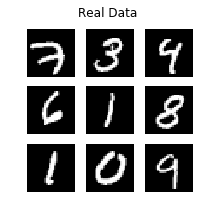

In [2]:
fig, ax = plt.subplots(3, 3, figsize=(3, 3))
fig.suptitle("Real Data")
index = 0
for i in range(3) :
    for j in range(3):
        ax[i][j].set_axis_off()
        ax[i][j].imshow( np.reshape( train_data[index], (28, 28)) ,cmap='gray')
        index += 1

#### placeholder

* **input_x** : 실제 MNIST 데이터를 담을 placeholder 입니다. $28\times 28\times 1 = 784$  


* **input_z** : Generate 이미지를 생성하기 위해 랜덤한 벡터를 담을 placeholder 입니다.

In [3]:
batch_size = 100
learning_rate = 0.0002

input_x = tf.placeholder(tf.float32, [batch_size, 784])
input_z = tf.placeholder(tf.float32, [batch_size, 128])

### Discriminator

구별자의 경우 진짜와 가짜를 판별하는 모델이기 때문에 최종적인 레이어의 아웃풋은 binary로 나와야 합니다. 구별자의 레이어는 기본적인 fully connected를 사용합니다. 구별자의 마지막 레이어의 output은 binary로 구분되어야 하기 때문에 range가 0~1인 sigmoid를 사용합니다.

In [4]:
def discriminate(input_data, reuse=False):
    with tf.variable_scope("discriminator", reuse=reuse):
        fc1 = tf.contrib.layers.fully_connected(input_data, 256, activation_fn=tf.nn.relu,
                                                weights_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01),
                                                biases_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
        discriminator = tf.contrib.layers.fully_connected(fc1, 1, activation_fn=tf.nn.sigmoid,
                                                          weights_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01),
                                                          biases_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    return discriminator    

### Generator

생성자의 경우 랜덤한 벡터를 사용해서 MNIST의 경우 0~9까지의 Digits을 생성하겠죠. 그러기 위해선 Ouput layer의 shape은 Real data의 shape과 동일해야 합니다. 생성자의 마지막 레이어의 output은 sigmoid를 사용했습니다. 그 이유는 현재 MNIST의 range가 0~1이기 때문에 그 범위에 맞추기 위함입니다.

In [5]:
def generate(fake_img, reuse=False):
    with tf.variable_scope("generator", reuse=reuse):
        gl_1 = tf.contrib.layers.fully_connected(fake_img, 256, activation_fn=tf.nn.relu,
                                                 weights_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01),
                                                 biases_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
        generator = tf.contrib.layers.fully_connected(gl_1, 784, activation_fn=tf.nn.sigmoid,
                                                      weights_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01),
                                                      biases_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    return generator    

In [6]:
fake_img = generate(input_z)
discriminate_fake = discriminate(fake_img, reuse=False)
discriminate_real = discriminate(input_x, reuse=True)

### Loss

Adversarial한 Training을 위해선 D, G가 동시에 학습하는 것이 아니라 순차적으로 학습되어야 합니다. 그러기 위해서 Gradient를 따로 설정해야 합니다.  
Tensorflow 자체에서 제공하는 함수에는 GAN의 목적함수를 사용할 수있는 함수가 없기 때문에 Trick을 사용합니다. 

* **g_loss** : discriminate_fake의 값이 1이 나와야 generator가 실제 이미지처럼 잘 생성하는 것이겠죠? 따라서 앞에 - 를 붙이고 generator의 loss를 minimize를 한다면 결국 discriminate_fake 값이 최대화되어 구별자를 잘 속일 수 있겠죠.


* **d_loss** : discriminator는 discriminate_real 의 값이 1, discriminate_fake 의 값이 0 이 나와야 구별자가 진짜와 가짜를 잘 구분하는 것이고 discriminator 를 maximize 하는 것은 수식 앞에 - 를 붙이고 minimize하는 것과 같겠죠.


* **trainable_list** : tensorflow 는 역전파로 tainable parameter들을 update할 시 default로 모든 훈련변수들을 update합니다. GAN의 경우에는 구별자와 생성자가 서로 독립적으로 번갈아 가면서 학습을 진행해야 합니다. 따라서 구별자에서 사용하는 변수와 생성자에서 사용하는 변수들을 따로 불어와서 각각 update합니다. trainable_list 는 학습가능한 모든 변수들을 리스트의 형태로 가지고 있습니다. 우리가 위의 generative/discriminative 함수에서 graph의 이름을 각각 "generator"와 "discriminator"로 지정했으니 모든 변수에서 해당 그래프의 이름으로 생성자와 구별자의 학습 파라메터를 나누어 줄 수 있습니다.

In [7]:
g_loss = tf.reduce_mean(tf.log(discriminate_fake))
d_loss = tf.reduce_mean(tf.log(discriminate_real) + tf.log(1 - discriminate_fake))

trainable_list = tf.trainable_variables() 

g_vars = [var for var in trainable_list if "generator" in var.name]
d_vars = [var for var in trainable_list if "discriminator" in var.name]

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [9]:
g_train = optimizer.minimize(-g_loss, var_list= g_vars)
d_train = optimizer.minimize(-d_loss, var_list = d_vars)

### Train

Learning start
Epoch 49 Loss G : -1.8433601060780624
Epoch 49 Loss D : -0.7753169053251093


Epoch 99 Loss G : -2.120098372589455
Epoch 99 Loss D : -0.6131193582036278




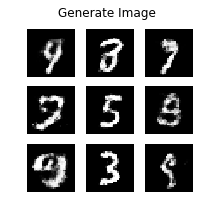

In [15]:
total_epoch = 100
print("Learning start")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(total_epoch):
        avg_g = 0
        avg_d = 0
        total_batch = int(len(train_data)/batch_size)
        for step in range(total_batch):
            z = np.random.normal(size=[batch_size, 128]).astype(np.float32)
            sess.run(g_train , feed_dict = {input_z : z})
            sess.run(d_train, feed_dict = {input_x : train_data[step*batch_size:(step+1)*batch_size] , input_z : z})
            gl, dl = sess.run([g_loss, d_loss], feed_dict = {input_x : train_data[step*batch_size:(step+1)*batch_size] , input_z : z})
            
            avg_g += gl/total_batch
            avg_d += dl/total_batch
        if (epoch+1)%50 == 0:    
            print("Epoch {} Loss G : {}".format(epoch, avg_g))
            print("Epoch {} Loss D : {}".format(epoch, avg_d))
            print("\n")

    generate_img = sess.run(fake_img, feed_dict={input_z: z})
    fig, ax = plt.subplots(3, 3, figsize=(3, 3))
    fig.suptitle("Generate Image")
    index = 0
    for i in range(3) :
        for j in range(3):
            ax[i][j].set_axis_off()
            ax[i][j].imshow( np.reshape( generate_img[index], (28, 28)) ,cmap='gray')
            index += 1